# Data Analyst Bootcamp (Week 4: June 2022)

## WEEK 4 PRESENTATION - Working File

### Project Brief (Alastair Brown):

1.	Find and download a new raw (uncleaned) data set. Choose either Python or R and import your data set into either Jupyter Notebook or RStudio.


2.	Clean and transform your data with code.


3.	Create a 5-10 minute presentation showing your dataframe, the code you used to clean and transform your dataframe.


4.	Create 3 different visualisations/charts/plots in your Jupyter Notebook or RStudio. Again, Powerpoint not required this week.


5.	Plan your approach and tell us about your trials and triumph


6.	Use any bootcamp code you have saved but also any online resources. But do not simply copy and paste code. You must modify code snippets to suit your dataset and purpose.


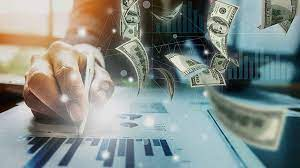

### Dataset Name: 		Forbes billionaires 2022

### Cleaning Required: 	

    a) Need to remove $ and B from all cells in ‘Net Worth’ column.
    
    b) Check for spelling errors in other columns (Eg. Loreal in ‘Source of Income’ column, etc).
    
    c) Identify any missing values to determine reliabilty of each variables' data. Consider removing variables/columns if too much missing data that it is deemed unreliable.
    
### Question/angle ideas:

    - What are the biggest contributing factors to Net Worth? (Age? Country? Industry? Or Source - is inheritance a factor?)
    

### Approach:	
            
    1. Look at which variables return the highest number (mode) of billionaires.

    2. Look at which variables return the highest combined ‘Net Worth’ totals
            
    3. Can you identify if there are any other correlations between variables that show trends (etc.) in the data?
            
    4. Research which graphs/charts/plots can best display this data for your presentation and identify the correct coding samples/examples to execute them on your data
            
    5. Talk about your final results/outcomes/findings, and what they mean and show most clearly. Are there any reasons outside of your data that could provide supporting knowledge to the trends you’ve identified with your data? Use any industry knowledge to try to explain this, if possible.
            
    6. Complete a self-assessment on your data analysis process to identify:
    
            - Did you encounter any problems/obstacles? (Limitations)
            
            - Can you identify any missing variables that could make your data analysis more effective?
            
            - What would you do differently next time? (Things you could improve on)
            
    7. Create your presentation in Jupyter Notebook:
    
            - Start a fresh notebook solely for your presentation and only copy the desired successful coding from your working notebook file
            
            - Use ‘Markdown’ coding cells to both annotate and insert pictures


In [27]:
#Step 1: Import your dataset/datafile in CSV format using Pandas library
import pandas as pd
FB22 = pd.read_csv("C:/Users/Honor/Downloads/Kaggle Datsets/2022_forbes_billionaires.csv")
FB22

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [28]:
#Step 2: Check source dataset for missing values
FB22.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

No missing values identified

In [29]:
#Step 3: Check source dataset for duplicate records
dupB = FB22[FB22.duplicated()]
print(dupB)

Empty DataFrame
Columns: [Unnamed: 0, rank, name, networth, age, country, source, industry]
Index: []


There are no fully duplicated records in the dataset

In [30]:
dupB2 = FB22[FB22[['name']].duplicated()]
print(dupB2)

      Unnamed: 0  rank                    name networth  age country  \
1797        1797  1729  Wang Yanqing & family    $1.7 B   75   China   
2131        2131  2076                  Li Li    $1.4 B   58   China   

                     source        industry  
1797  carbon fiber products  Manufacturing   
2131        pharmaceuticals     Healthcare   


These 2 records don't appear to be duplicates of each other.
Therefore there are no duplicates in the name field meaning no errors there.

In [31]:
#drop the 'unnamed' ID column as it is just a sequence of numbers
FB22.drop(['Unnamed: 0'], axis = 1, inplace = True)
FB22

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [32]:
FB22["Net Worth(Clean)"] = FB22["networth"]
FB22["Net Worth(Clean)"] = FB22["Net Worth(Clean)"].str.replace("B", "")
FB22["Net Worth(Clean)"] = FB22["Net Worth(Clean)"].str.replace("$", "")
FB22

C:\Users\Honor\AppData\Local\Temp\ipykernel_10892\32758242.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  FB22["Net Worth(Clean)"] = FB22["Net Worth(Clean)"].str.replace("$", "")


,rank,name,networth,age,country,source,industry,Net Worth(Clean)
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,219
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,171
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,158
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,129
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,118
...,...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare,1
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail,1
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail,1
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail,1


In [33]:
#Step   : Convert "Net Worth(Clean)" column values from 'object' to 'float'
FB22["Net Worth(Clean)"] = FB22["Net Worth(Clean)"].astype(float)

In [34]:
FB22.dtypes

rank                  int64
name                 object
networth             object
age                   int64
country              object
source               object
industry             object
Net Worth(Clean)    float64
dtype: object

In [9]:
FB22.describe(include = 'all')

,rank,name,networth,age,country,source,industry,Net Worth(Clean)
count,2600.000000,2600,2600,2600.000000,2600,2600,2600,2600.000000
unique,NaN,2598,228,NaN,75,895,18,NaN
top,NaN,Wang Yanqing & family,$1.5 B,NaN,United States,real estate,Finance & Investments,NaN
freq,NaN,2,147,NaN,719,148,386,NaN
mean,1269.570769,NaN,NaN,64.271923,NaN,NaN,NaN,4.860750
std,728.146364,NaN,NaN,13.220607,NaN,NaN,NaN,10.659671
min,1.000000,NaN,NaN,19.000000,NaN,NaN,NaN,1.000000
25%,637.000000,NaN,NaN,55.000000,NaN,NaN,NaN,1.500000
50%,1292.000000,NaN,NaN,64.000000,NaN,NaN,NaN,2.400000
75%,1929.000000,NaN,NaN,74.000000,NaN,NaN,NaN,4.500000


In [10]:
FB22.nunique()

rank                 228
name                2598
networth             228
age                   76
country               75
source               895
industry              18
Net Worth(Clean)     228
dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

### Country Variable Analysis

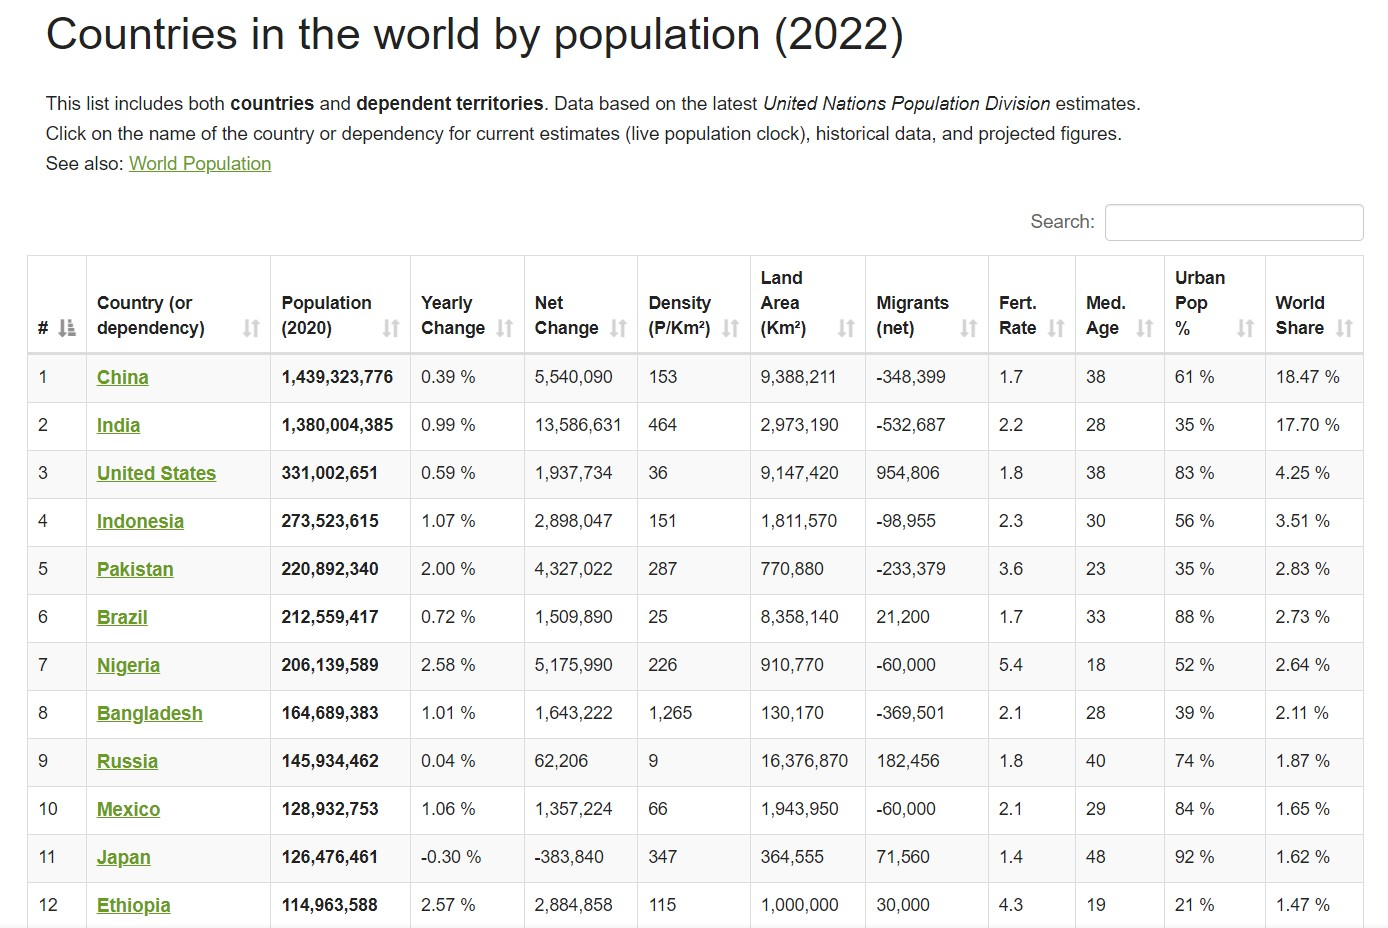

In [12]:
#No. of Billionaire's per country - Top 5 & Bottom 5
FB22.country.value_counts()

United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: country, Length: 75, dtype: int64

US, China, India have some of world's largest populations, so maybe not a huge surprise that they are the Top 3 on this list.
If we had a population variable in this dataset, then we could also analyse which countries have the highest number of billionaires per person.

In [13]:
#Sum of Billionaires' Net Worth per COUNTRY - TOP 15
CNW = FB22.groupby('country')['Net Worth(Clean)'].sum()
Sorted_CNW = CNW.sort_values(ascending=False)
Sorted_CNW.head(15)

country
United States     4685.10
China             1938.45
India              744.80
Germany            604.00
France             550.00
Hong Kong          383.40
Russia             318.20
Canada             307.90
Australia          205.10
United Kingdom     199.10
Italy              194.50
Brazil             184.70
Switzerland        181.90
Sweden             165.70
Mexico             160.90
Name: Net Worth(Clean), dtype: float64

In [14]:
#Billionaires' Mean Net Worth per COUNTRY - TOP 15
CNW = FB22.groupby('country')['Net Worth(Clean)'].mean()
Sorted_CNW = CNW.sort_values(ascending=False)
Sorted_CNW.head(15)

country
France                  12.790698
Mexico                  10.726667
Nigeria                  9.400000
Denmark                  7.000000
United States            6.516134
Ireland                  6.088889
Colombia                 6.025000
Cyprus                   5.733333
Hong Kong                5.722388
Austria                  5.609091
Chile                    5.514286
Czechia                  5.444444
Eswatini (Swaziland)     5.300000
Algeria                  5.100000
South Africa             5.000000
Name: Net Worth(Clean), dtype: float64

### Source Variable Analysis

In [15]:
#No. of Billionaire's per SOURCE - Top 5 & Bottom 5
FB22.source.value_counts()

real estate               148
investments                93
pharmaceuticals            91
diversified                83
software                   57
                         ... 
ticketing service           1
touch screens               1
defense                     1
shipping, airlines          1
flavors and fragrances      1
Name: source, Length: 895, dtype: int64

'Real Estate' - does this refer to the real estate industry, or to selling real estate from inheritance?
'Diversified' - does this refer to multiple sources of income? Or have these billionaires profited from directly working with diversity?

In [16]:
#Sum of Billionaires' Net Worth per SOURCE - TOP 10
SNW = FB22.groupby('source')['Net Worth(Clean)'].sum()
Sorted_SNW = SNW.sort_values(ascending=False)
Sorted_SNW.head(15)

source
real estate        573.8
diversified        382.0
investments        358.3
software           289.7
pharmaceuticals    284.4
hedge funds        271.6
Google             260.9
Walmart            238.0
Microsoft          232.4
Tesla, SpaceX      219.0
Amazon             214.6
LVMH               158.0
mining             152.0
telecom            149.5
private equity     147.8
Name: Net Worth(Clean), dtype: float64

In [17]:
#Billionaires' Mean Net Worth per SOURCE - TOP 15
CNW = FB22.groupby('source')['Net Worth(Clean)'].mean()
Sorted_CNW = CNW.sort_values(ascending=False)
Sorted_CNW.head(15)

source
Tesla, SpaceX                  219.000000
LVMH                           158.000000
Amazon                         107.300000
infrastructure, commodities     90.000000
L'Oréal                         74.800000
beverages, pharmaceuticals      65.700000
Koch Industries                 60.000000
Microsoft                       58.100000
Dell computers                  55.100000
Google                          52.180000
Nike                            47.300000
Berkshire Hathaway              41.133333
Walmart                         34.000000
Zara                            32.700000
music, chemicals                32.500000
Name: Net Worth(Clean), dtype: float64

### Industry Variable Analysis

In [18]:
#No. of Billionaire's per Industry
FB22.industry.value_counts()

Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: industry, dtype: int64

In [19]:
#Sum of Billionaires' Net Worth per INDUSTRY - TOP 10
INW = FB22.groupby('industry')['Net Worth(Clean)'].sum()
Sorted_INW = INW.sort_values(ascending=False)
Sorted_INW.head(15)

industry
Technology                2168.40
Finance & Investments     1734.30
Fashion & Retail          1613.20
Manufacturing             1079.80
Diversified                939.50
Food & Beverage            933.35
Healthcare                 708.90
Real Estate                685.80
Automotive                 582.60
Media & Entertainment      493.60
Energy                     395.30
Metals & Mining            389.70
Telecom                    205.10
Logistics                  196.20
Service                    186.10
Name: Net Worth(Clean), dtype: float64

In [20]:
#Billionaires' Mean Net Worth per INDUSTRY - TOP 15
INW = FB22.groupby('industry')['Net Worth(Clean)'].mean()
Sorted_INW = INW.sort_values(ascending=False)
Sorted_INW.head(15)

industry
Automotive                8.443478
Technology                6.590881
Fashion & Retail          6.557724
Telecom                   5.860000
Metals & Mining           5.816418
Logistics                 5.605714
Diversified               5.278090
Media & Entertainment     5.195789
Gambling & Casinos        4.678261
Food & Beverage           4.643532
Finance & Investments     4.493005
Energy                    4.250538
Sports                    3.753846
Service                   3.649020
Real Estate               3.628571
Name: Net Worth(Clean), dtype: float64

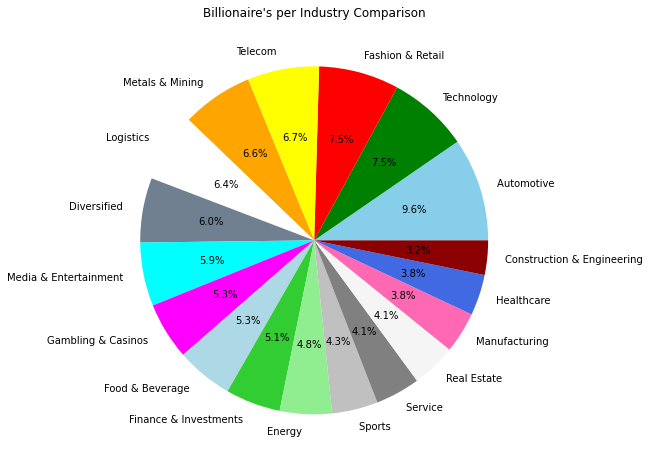

In [21]:
#Pie-chart
value = Sorted_INW
my_colors = ['skyblue', 'green', 'red', 'yellow', 'orange', 'white', 'slategrey', 'cyan', 'fuchsia', 'lightblue', 'limegreen', 'lightgreen', 'silver', 'grey', 'whitesmoke', 'hotpink', 'royalblue', 'darkred']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title("Billionaire's per Industry Comparison")
plt.show()

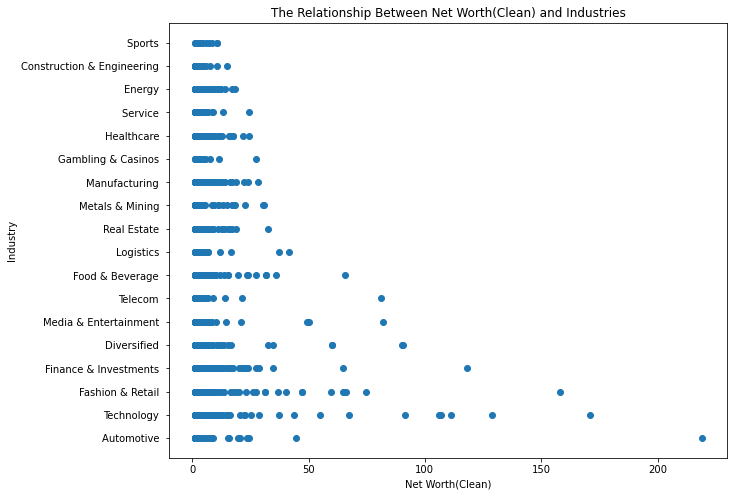

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(FB22['Net Worth(Clean)'],FB22['industry'], label = "Net Worth(Clean)")
plt.xlabel("Net Worth(Clean)")
plt.ylabel("Industry")
plt.title("The Relationship Between Net Worth(Clean) and Industries")
plt.show()

### Age Variable Analysis

In [23]:
#No. of Billionaire's per Age - Top 5 & Bottom 5
FB22.age.value_counts()

64     152
58      79
59      78
54      77
57      77
      ... 
27       2
26       2
29       2
19       1
100      1
Name: age, Length: 76, dtype: int64

150 people about to hit retirement age that aren't worried about their pensions!
1 person is the richest teenager on the planet.

In [24]:
#Sum of Billionaires' Net Worth per Age - TOP 15

ANW = FB22.groupby('age')['Net Worth(Clean)'].sum()
Sorted_ANW = ANW.sort_values(ascending=False)
Sorted_ANW.head(15)

age
64    738.80
66    505.10
58    490.85
73    436.60
59    419.50
77    386.10
50    384.60
57    382.00
68    326.20
72    322.90
71    312.10
67    312.00
82    310.80
54    296.00
86    283.90
Name: Net Worth(Clean), dtype: float64

In [25]:
#Billionaires' Mean Net Worth per Age - TOP 15

ANW = FB22.groupby('age')['Net Worth(Clean)'].mean()
Sorted_ANW = ANW.sort_values(ascending=False)
Sorted_ANW.head(15)

age
91    17.250000
37    12.044444
50    10.121053
30     9.466667
82     9.418182
38     9.155556
86     8.603030
73     8.560784
92     7.888889
93     7.883333
66     7.427941
77     7.425000
94     6.844444
84     6.537931
44     6.366667
Name: Net Worth(Clean), dtype: float64

(5.0, 0.0)

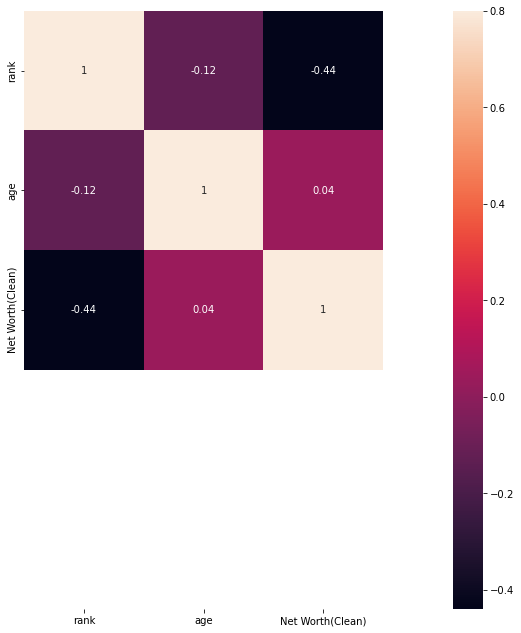

In [327]:
plt.figure(figsize=(25,11))
ax = sns.heatmap(FB22.corr(), vmax=0.8, square=True, annot_kws={'size':10}, annot=True)
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0) 

There is almost no correlation between age and net worth at 0.04, and only a slighter bigger correlation age and rank at -0.12. The big negative correlation between net worth and rank is expected, because the higher the rank number gets, the lower the net worth will be.

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

    - Note: If there is no indicator for inheritance, can you make any correlation with surname for related families that potentially inherited their fortune or were gifted it from a sibling, spouse or parent? Look at divorcees and whether a divorce settlement payment could have contributed? Eg. Jeff Bezos wife (use industry knowledge)
                    

In [ ]:
Sorted_ANW.head(15)

In [177]:
import numpy as np

In [312]:
Net_Worth=FB22.groupby('age')['Net Worth(Clean)'].mean().to_frame().reset_index()

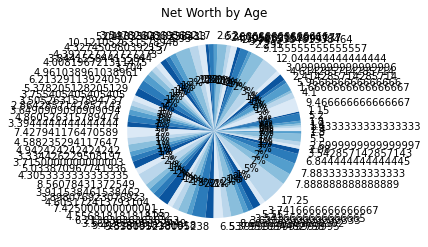

In [315]:
palette_color = sns.color_palette('Blues')
plt.pie('Net Worth(Clean)', labels = 'Net Worth(Clean)',data = Net_Worth , colors = palette_color,autopct = '%0.0f%%')
plt.title('Net Worth by Age')
plt.xlabel(None)
plt.ylabel(None)  
plt.show()

In [299]:
bee = ({:0.2f}.format(CNW))
Sorted_bee = bee.sort_values(ascending=False)
Sorted_bee.head(15)

SyntaxError: invalid syntax (4201944951.py, line 1)

## Questions?

How do i reference a specific column from a datafile?
- Do i use some combination of.loc coding?

How do i clean the B's from the 'networth' column? 
- Do i use some combination of split to separate the characters, followed by pop to remove the B at the end of each cell in that column?



1. Use 'regex' coding to clean data
2. create/add a new column to dataframe ( call it something like 'networth clean')
3. get rid of $ and B

In [226]:
FB22["networth"] = FB22["networth"].astype(float)

ValueError: could not convert string to float: '$219 B'

In [267]:
#Sources of Income Ranked by Combined Sum of Billionaires' Net Worth - TOP 10
SNW = FB22.groupby('source')['Net Worth(Clean)'].sum()
SNWR = SNW['Hierarchy_Rank'] = SNW.rank(ascending=False)
Sorted_SNWR = SNWR.sort_values(ascending=True)
Sorted_SNWR.head(10)

source
real estate         1.0
diversified         2.0
investments         3.0
software            4.0
pharmaceuticals     5.0
hedge funds         6.0
Google              7.0
Walmart             8.0
Microsoft           9.0
Tesla, SpaceX      10.0
Name: Net Worth(Clean), dtype: float64

In [220]:
for method in []:
    FB22[f'{method}_rank'] = Hi.rank(method)
FB22

,rank,name,networth,age,country,source,industry,Net Worth(Clean),Industry_Rank,Age_Rank,max_rank
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,219.0,340.5,340.5,69.0
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,171.0,854.0,854.0,329.0
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,158.0,1923.0,1923.0,246.0
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,129.0,1471.5,1471.5,328.0
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,118.0,2546.5,2546.5,386.0
...,...,...,...,...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare,1.0,2272.5,2272.5,5.0
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail,1.0,2360.0,2360.0,4.0
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail,1.0,1791.5,1791.5,4.0
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail,1.0,1606.5,1606.5,4.0


In [213]:
FB22['Age_Rank'] = FB22['age'].rank(ascending=True)
print(FB22)

      rank                       name networth  age        country  \
0        1                 Elon Musk    $219 B   50  United States   
1        2                Jeff Bezos    $171 B   58  United States   
2        3  Bernard Arnault & family    $158 B   73         France   
3        4                Bill Gates    $129 B   66  United States   
4        5            Warren Buffett    $118 B   91  United States   
...    ...                        ...      ...  ...            ...   
2595  2578    Jorge Gallardo Ballart      $1 B   80          Spain   
2596  2578              Nari Genomal      $1 B   82    Philippines   
2597  2578            Ramesh Genomal      $1 B   71    Philippines   
2598  2578            Sunder Genomal      $1 B   68    Philippines   
2599  2578     Horst-Otto Gerberding      $1 B   69        Germany   

                      source                industry  Net Worth(Clean)  \
0              Tesla, SpaceX             Automotive              219.0   
1          

In [178]:
#Industry vs Industry
Technology = len(FB22[FB22['industry'] == 'Technology'])
Finance_and_Investments = len(FB22[FB22['industry'] == 'Finance & Investments'])

print("The number of billionaire's in the Technology sector are :  %i (%.1f%%)"% (Technology, (Technology)/len(FB22)*100 ))
print("The number of billionaire's in the Finance_and_Investments sector are :  %i (%.1f%%)"% (Finance_and_Investments, (Finance_and_Investments)/len(FB22)*100 ))

The number of billionaire's in the Technology sector are :  0 (0.0%)
The number of billionaire's in the Finance_and_Investments sector are :  0 (0.0%)


In [28]:
import re

In [43]:
FB22['networth'] = FB22['networth'].astype('string')
FB22.dtypes

rank         int64
name        object
networth    string
age          int64
country     object
source      object
industry    object
dtype: object

In [45]:
net = FB22["networth"]

In [47]:
clean = re.findall(r'[$B]+', FB22["networth"])  #find [this text], inside this dataset's [column name]

clean2 = ' '.join(clean) #join the text back together without the 'cleaned' text/symbols

TypeError: expected string or bytes-like object

In [42]:
clean = re.findall(r'[$]+', FB22)  #find [this text], inside this dataset's [column name]

clean2 = ' '.join(clean) #join the text back together without the 'cleaned' text/symbols

TypeError: expected string or bytes-like object

In [110]:
FB22["Net Worth(Clean)"] = FB22["networth"].str.replace("$", "") and FB22["networth"].str.replace("B", "")
FB22

C:\Users\Honor\AppData\Local\Temp\ipykernel_12576\3280214907.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  FB22["Net Worth(Clean)"] = FB22["networth"].str.replace("$", "") and FB22["networth"].str.replace("B", "")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [105]:
FB22["networth"] = FB22["networth"].str.replace("$ , B", " , ")

C:\Users\Honor\AppData\Local\Temp\ipykernel_12576\4125284813.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FB22["networth"] = FB22["networth"].str.replace("$ , B", " , ")


In [ ]:
#Create/add a new column to show cleaned networth figures (without '$' and without 'B')
import re

FB22['Net Worth(Clean)'] = FB22[clean2]  #change coding to reflect/include data cleaning from cell below
FB22

In [29]:
type(re.findall)

function

In [70]:
type(clean)

pandas.core.series.Series

In [68]:
clean = net.str.findall(r'[$B]+')

In [73]:
clean

0       [$, B]
1       [$, B]
2       [$, B]
3       [$, B]
4       [$, B]
         ...  
2595    [$, B]
2596    [$, B]
2597    [$, B]
2598    [$, B]
2599    [$, B]
Name: networth, Length: 2600, dtype: object

In [69]:
clean2 = ' '.join(clean) #join the text back together without the 'cleaned' text/symbols

TypeError: sequence item 0: expected str instance, list found

In [ ]:
#drop columns
FB22.drop(['networth(clean)'], axis = 1, inplace = True)
df

In [21]:
FB22.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [26]:
type(FB22)

pandas.core.frame.DataFrame